In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)

In [ ]:
digits.target.shape

In [ ]:
digits.data.shape

In [ ]:
digits.images.shape

In [ ]:
import matplotlib.pyplot as plt
x=digits.images[87]
print(digits.target[87])
plt.gray()     #for black and whit image
plt.imshow(x)      # to show image
plt.show()


# Preproccessing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
x_train.shape,x_train.shape, y_train.shape, y_test.shape

In [ ]:
x_train[0]

# PCA

In [ ]:
x_train.shape, x_test.shape

In [23]:
from sklearn.decomposition import PCA
pca= PCA(n_components=32)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

# Preproccessing

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0]

# Performance metrics

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    p = precision_score(y_test, y_pred_test, average='weighted')
    r = recall_score(y_test, y_pred_test, average='weighted')
    
    print(f"acc_train: {acc_train} -acc_test: {acc_test} - precision: {p} - recall: {r}")
    return acc_train, acc_test, p, r

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=128, n_estimators=200, criterion= 'gini')
rf.fit(x_train, y_train)

In [ ]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# SVM   -->became beter

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel= 'poly')
svm.fit(x_train, y_train)


In [ ]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_svm, acc_test_svm, p_svm, r_svmh = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= 256, batch_size=64, learning_rate= 'adaptive')
ann.fit(x_train, y_train)

In [ ]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# COMPARISON

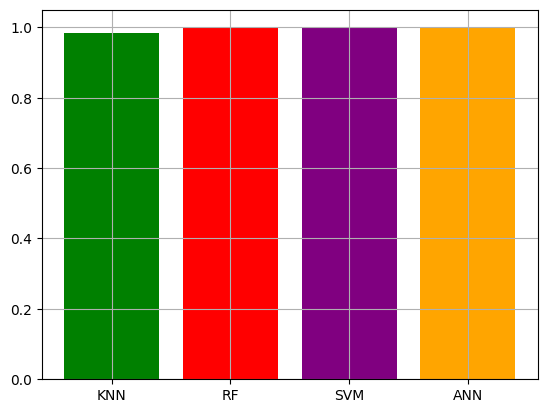

In [43]:
import matplotlib.pyplot as plt

acc_train = [ acc_train_knn, acc_train_rf, acc_train_svm, acc_train_ann]
title = [ "KNN",  "RF", "SVM",  "ANN"]
colors = ['green','red', 'purple', 'orange']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()

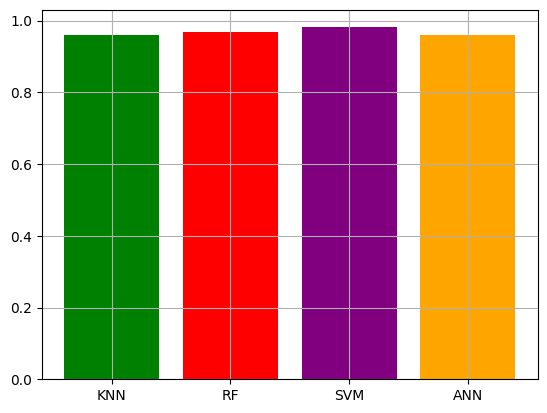

In [44]:
acc_test = [ acc_test_knn, acc_test_rf, acc_test_svm, acc_test_ann]
title = ["KNN", "RF","SVM","ANN"]
colors = ['green','red', 'purple', 'orange']
plt.bar(title, acc_test, color = colors)
plt.grid()
plt.show()

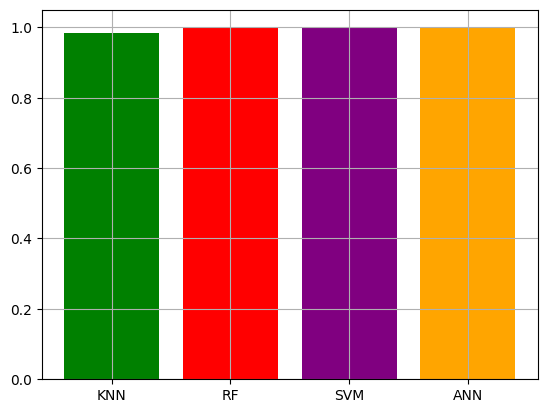

In [45]:
p = [p_knn, p_rf, p_svm, p_ann]
title = ["KNN", "RF", "SVM", "ANN"]
colors = ['green','red', 'purple', 'orange']
plt.bar(title, acc_train, color = colors)
plt.grid()
plt.show()